References:
- https://github.com/elisno/outlier_mnli/blob/main/outlier_mnli.ipynb
- https://towardsdatascience.com/understanding-outliers-in-text-data-with-transformers-cleanlab-and-topic-modeling-db3585415a19

In [30]:
import pickle
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from umap import UMAP
from cleanlab.outlier import OutOfDistribution

def get_section_content(section):
    return section['content'].replace('\n', ' ').strip()

embeddings_location = '../page-embeddings.pkl'
outlier_scores_location = 'section_outlier_scores.pkl'

with open(embeddings_location, "rb") as reader:
    cache_data = pickle.load(reader)
    sections = cache_data['sections']
    corpus_embeddings = cache_data['embeddings']

passages = []
passages.extend(map(get_section_content, sections))
print('Passages:', len(passages))

Passages: 180783


In [ ]:
ood = OutOfDistribution()
train_outlier_scores = ood.fit_score(features=corpus_embeddings)

In [58]:
with open(outlier_scores_location, "wb") as writer:
    pickle.dump({'scores': train_outlier_scores}, writer)

In [10]:
with open(outlier_scores_location, "rb") as reader:
    cache_data = pickle.load(reader)
    train_outlier_scores = cache_data['scores']

In [27]:
numpy_passages = np.array(passages)
numpy_sections = np.array(sections)
numpy_embeddings = np.array(corpus_embeddings)

top_train_outlier_idxs = (train_outlier_scores).argsort()[:15]
outlier_passages = numpy_passages[top_train_outlier_idxs]
outlier_sections = numpy_sections[top_train_outlier_idxs]

df = pd.DataFrame.from_records(pd.json_normalize(outlier_sections, sep='_'))
df.head(15)

,content,tokens,page_url,page_title,page_summary
0,I’m trying to figure out how to get ground pec...,84,https://www.designbetter.co/conversations/jere...,Jeremy Faludi: exploring sustainable design be...,"Featuring Jeremy Faludi Assistant Professor, D..."
1,\nI tried to make my own sneakers. That was sh...,89,https://danmall.com/posts/2021-year-in-review/,"“2021 Year in Review,” an article by Dan Mall","Continuing the tradition from 2020, 2019, and ..."
2,Middle divider\nToothbrush$4.50Pinstriped corn...,68,https://mui.com/material-ui/react-divider/,React Divider component - Material UI,Divider A divider is a thin line that groups c...
3,\n\n\n\n\n\n\nBeats Solo3 Wireless\nBeats Solo...,296,https://danmall.com/posts/should-you-use-boots...,“Should You Use Bootstrap or Material Design f...,Bootstrap and Material Design are incredibly t...
4,What is it?\nPeople with vestibular disorders ...,201,https://www.a11yproject.com/posts/understandin...,Background: A primer to vestibular disorders -...,A primer to vestibular disorders Table of Cont...
5,\nI played Wordle for 272 days straight. I mea...,44,https://danmall.com/posts/2022-year-in-review/,"“2022 Year in Review,” an article by Dan Mall","Continuing the tradition from 2021, 2020, 2019..."
6,They even had the audacity to send follow-up s...,208,https://bradfrost.com/blog/post/bradfrost-dot-...,bradfrost.com | Brad Frost,"bradfrost.com After 10 years, I finally secure..."
7,\n\nJames Baldwin\nAnyone who has ever struggl...,206,https://paste.twilio.design/components/table,Table - Paste: The Design System for building ...,"|Agents||Skills||Tasks| |Adam Brown||English, ..."
8,نجم هذا القرار عن دعوى قضائية في محكمة جزئية ...,264,https://build.washingtonpost.com/resources/acc...,WPDS - Semantic HTML and ARIA | Resources,Heading order and page landmarks Heading order...
9,\nWhat is the air-speed velocity of an unladen...,186,https://clarity.design/documentation/wizards,Clarity Design System - Documentation - Wizards,Wizards provide a way to go through a sequence...


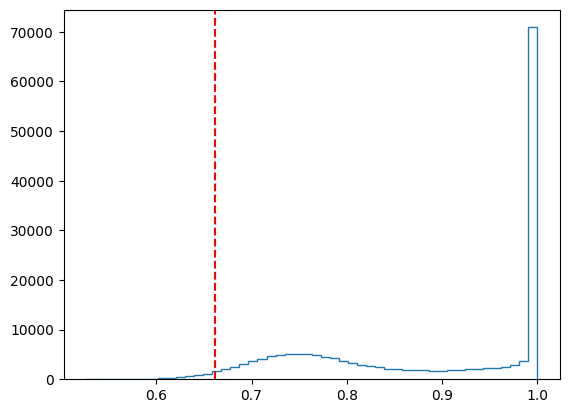

In [23]:
threshold = np.percentile(train_outlier_scores, 2.5)

plt_range = [train_outlier_scores.min(), train_outlier_scores.max()]

counts, bins = np.histogram(train_outlier_scores, range=plt_range, bins=50)
diagram = plt.stairs(counts, bins)
plt.axvline(threshold, color='r', linestyle='--')

In [24]:
sorted_ids = train_outlier_scores.argsort()
outlier_scores = train_outlier_scores[sorted_ids]
outlier_ids = sorted_ids[outlier_scores < threshold]

selected_outlier_sections = numpy_sections[outlier_ids]

df = pd.DataFrame.from_records(pd.json_normalize(selected_outlier_sections, sep='_'))
df.tail(15)

,content,tokens,page_url,page_title,page_summary
4505,\nRight arrow key on a cell will move the user...,131,https://www.lightningdesignsystem.com/componen...,Tree Grid - Lightning Design System,|Choose a row| Account Name Sort by: Employees...
4506,"Human, but not individual\nToo much personalit...",247,https://polaris.shopify.com/content/merchant-t...,Merchant-to-customer content — Shopify Polaris,Merchant-to-customer content Shopify creates c...
4507,\nGeneral App\nGeneral E-commerce\nGeneral Ana...,276,https://mui.com/store/items/minimal-dashboard/,Minimal - Client &amp; Admin Dashboard - MUI S...,| | 📦 Package | |Standard | |Plus | |Extended ...
4508,"For example, you will use Style Dictionary, wh...",48,https://designstrategy.guide/design-management...,Design Tokens 101 - Design strategy guide,Naming Conventions Handoff process The powerfu...
4509,"For example, you will use Style Dictionary, wh...",48,https://designstrategy.guide/design-system/des...,Design Tokens 101 - Design strategy guide,Naming Conventions Handoff process The powerfu...
4510,itions/)noneleftleftleftnonepositionpositionpo...,96,https://mui.com/system/properties/,Properties - MUI System,Properties This page lists all of the custom s...
4511,Yosemite\nNational Park\nFeatured11710.4k### R...,174,https://mui.com/joy-ui/react-card/,React Card component - Joy UI,Skip to content Card A card is a generic conta...
4512,\nStepper: remove size prop (49f31ce)\n,50,https://orbit.kiwi/changelog/,Changelog | Orbit,CountryFlag:The default code for CountryFlag i...
4513,"""Developer (43671)"")Documentation (47.49KB)Eco...",234,https://atlassian.design/resources/logo-library,Logo library - Resources - Atlassian Design Sy...,Before using these logos it's good practice to...
4514,Scott Hutcheson\nProduct Engineer at CodeSandb...,68,https://www.radix-ui.com/case-studies/codesandbox,CodeSandbox – Case studies – Radix UI,Case study CodeSandbox Radix has significantly...


In [31]:
selected_outlier_subset_embeddings = numpy_embeddings[outlier_ids]

umap_fit = UMAP(n_components=3, n_neighbors=8, random_state=42)
selected_outlier_subset_embeddings_umap = umap_fit.fit_transform(selected_outlier_subset_embeddings)

In [33]:
fig_3d = px.scatter_3d(
    selected_outlier_subset_embeddings_umap, x=0, y=1, z=2,
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()